# LANDSLIDE PREDICTION MODEL for Southern California 

(Validation Set from: Himalayas and North-East India)

Input Parameters-: 
Slope, Curvature,Elevation, Drainage, Aspect,TWI, Geology, Rainfall, LULC,Geomorphology,TWI 

Binary Classification Model Based on Multi-Layer Perceptron Neural Network 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
# Load dataset
 
slide=pd.read_csv("C://Users//rashi//OneDrive//Desktop//USC//Python//ML_tutorial//landslide_data.csv")

slide.columns
slide.head()

,Training,SLOPE,ELEVATION,CURVATURE,drainage DENSITY,ASPECT,TWI,SPI,RAINFALL,LULC,GEOLOGY,GEOMORPHOLOGY
0,1,32.884663,1500,1.381667,1.032242,38.072781,4.918111,57.162582,1778.364380,2,4,1
1,1,22.366800,1443,-0.921111,0.719414,8.297145,5.657652,48.507725,1785.398438,7,4,1
2,1,22.473547,1264,0.460555,1.364391,344.538788,5.364686,36.573547,1788.034546,2,4,1
3,1,14.915683,877,0.690833,0.935202,99.162346,4.706253,7.850158,1800.178955,2,3,1
4,1,16.065662,1417,-0.805972,0.833821,170.676407,4.628237,8.487121,1784.860352,7,4,1


# Exploratory Data Analysis (EDA)

<AxesSubplot:>

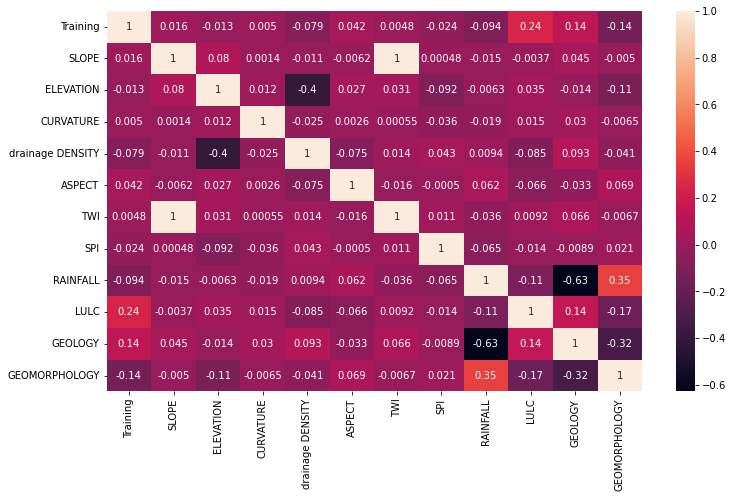

In [5]:
# Correlation Plot 
plt.figure(figsize=(12,7))
sn.heatmap(slide.corr(),annot=True)

In [6]:
# target variable
y=slide.Training

In [7]:
# get dummies 
dummies=pd.get_dummies(data=slide,columns=['LULC','GEOLOGY','GEOMORPHOLOGY'])

# drop uneeded target and escape dummy trap
dummies=dummies.drop(['Training','LULC_2','GEOLOGY_4','GEOMORPHOLOGY_9'],axis='columns')
dummies

X_temp1=dummies.drop(['SLOPE','ELEVATION','CURVATURE','drainage DENSITY','ASPECT','TWI','SPI','RAINFALL'],axis='columns')
X_temp1

,LULC_1,LULC_3,LULC_5,LULC_6,LULC_7,LULC_8,GEOLOGY_0,GEOLOGY_1,GEOLOGY_2,GEOLOGY_3,GEOMORPHOLOGY_1,GEOMORPHOLOGY_2,GEOMORPHOLOGY_4,GEOMORPHOLOGY_5,GEOMORPHOLOGY_6,GEOMORPHOLOGY_7,GEOMORPHOLOGY_8
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2239,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2240,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2241,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [8]:
# feature scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_temp = sc.fit_transform(dummies[['SLOPE','CURVATURE','drainage DENSITY','ASPECT','TWI','SPI','RAINFALL']])
X_temp

array([[ 0.0970842 ,  0.69378808, -0.13356997, ...,  0.00993356,
        -0.10036032, -0.57217375],
       [ 0.04751971, -0.39910232, -0.93380207, ...,  0.01343419,
        -0.10050641,  0.0332888 ],
       [ 0.04802275,  0.2566319 ,  0.7160885 , ...,  0.01204743,
        -0.10070785,  0.26019405],
       ...,
       [-0.02902039,  0.80307707,  1.23286853, ...,  0.01323464,
        -0.1012718 ,  1.14635926],
       [-0.02213178, -0.12587973, -0.69226194, ...,  0.04000754,
        -0.07780588, -0.30225158],
       [-0.04483456, -0.01659069,  1.78655909, ...,  0.01700709,
        -0.10130112, -0.70973545]])

In [9]:
#

X_1=pd.DataFrame(X_temp,columns=['SLOPE','CURVATURE','drainage DENSITY','ASPECT','TWI','SPI','RAINFALL'])
print(X_1)

#concat
X=pd.concat([X_1,X_temp1],axis=1)
X

         SLOPE  CURVATURE  drainage DENSITY    ASPECT       TWI       SPI  \
0     0.097084   0.693788         -0.133570 -1.108747  0.009934 -0.100360   
1     0.047520  -0.399102         -0.933802 -1.371963  0.013434 -0.100506   
2     0.048023   0.256632          0.716089  1.600406  0.012047 -0.100708   
3     0.012407   0.365921         -0.381803 -0.568717  0.008931 -0.101193   
4     0.017826  -0.344458         -0.641142  0.063466  0.008561 -0.101182   
...        ...        ...               ...       ...       ...       ...   
2238 -0.026087  -0.726969         -0.392927 -1.316826  0.040077 -0.082493   
2239  0.157291   0.529854         -0.670720 -1.375815  0.005841 -0.100307   
2240 -0.029020   0.803077          1.232869  1.574118  0.013235 -0.101272   
2241 -0.022132  -0.125880         -0.692262  0.475042  0.040008 -0.077806   
2242 -0.044835  -0.016591          1.786559 -0.984526  0.017007 -0.101301   

      RAINFALL  
0    -0.572174  
1     0.033289  
2     0.260194  
3     1

,SLOPE,CURVATURE,drainage DENSITY,ASPECT,TWI,SPI,RAINFALL,LULC_1,LULC_3,LULC_5,...,GEOLOGY_1,GEOLOGY_2,GEOLOGY_3,GEOMORPHOLOGY_1,GEOMORPHOLOGY_2,GEOMORPHOLOGY_4,GEOMORPHOLOGY_5,GEOMORPHOLOGY_6,GEOMORPHOLOGY_7,GEOMORPHOLOGY_8
0,0.097084,0.693788,-0.133570,-1.108747,0.009934,-0.100360,-0.572174,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.047520,-0.399102,-0.933802,-1.371963,0.013434,-0.100506,0.033289,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.048023,0.256632,0.716089,1.600406,0.012047,-0.100708,0.260194,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.012407,0.365921,-0.381803,-0.568717,0.008931,-0.101193,1.305534,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0.017826,-0.344458,-0.641142,0.063466,0.008561,-0.101182,-0.013027,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,-0.026087,-0.726969,-0.392927,-1.316826,0.040077,-0.082493,-0.898625,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2239,0.157291,0.529854,-0.670720,-1.375815,0.005841,-0.100307,1.199894,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2240,-0.029020,0.803077,1.232869,1.574118,0.013235,-0.101272,1.146359,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2241,-0.022132,-0.125880,-0.692262,0.475042,0.040008,-0.077806,-0.302252,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [10]:
# test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)

len(y_test[y_test==0])

406

# Supervised ML Algorithms 

# Support vector Machines (SVM)

In [12]:
# SVM model

from sklearn.svm import SVC


#
model_svm=SVC(C=10,gamma=1,kernel='rbf')

# train model
model_svm.fit(X_train,y_train)

# predict
y_pred_svm=model_svm.predict(X_test)

#accuracy 
acc_svm=model_svm.score(X_test,y_test)
acc_svm

0.8730512249443207

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=400)

# train model
model_rf.fit(X_train,y_train)

# prediction
y_pred_rf=model_rf.predict(X_test)

# score
acc_rf=model_rf.score(X_test,y_test)
print(f"The score of the Random Forest Classifier is: {round(acc_rf*100,2)}%")

The score of the Random Forest Classifier is: 96.44%


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

# train model
model_lr.fit(X_train,y_train)

# prediction 
y_pred_lr=model_lr.predict(X_test)

# score
acc_lr=model_lr.score(X_test,y_test)
print("The score of the LR model is:",round(acc_lr*100,2),"%")

# y_pred
y_pred_lr

The score of the LR model is: 91.09 %


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Decision Tree 

In [15]:
from sklearn import tree
model_dt=tree.DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

# score of model
acc_dt=model_dt.score(X_test,y_test)
print(f"The score of the Decision Tree model is: {round(acc_dt*100,2)}%")

y_pred_dt=model_dt.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix

cm_dt=confusion_matrix(y_test,y_pred_dt)
print(cm_dt)

The score of the Decision Tree model is: 94.43%
[[389  17]
 [  8  35]]


# Artificial Neural Network(ANN)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [12]:
# Binary Clssification using ANN

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='leaky_relu',input_dim =24 ))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 30, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size =5, epochs = 100)

Epoch 1/100
241/241 [==============================] - 1s 3ms/step - loss: 0.3968 - accuracy: 0.8793 - val_loss: 0.3260 - val_accuracy: 0.9005
Epoch 2/100
241/241 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8826 - val_loss: 0.3097 - val_accuracy: 0.9005
Epoch 3/100
241/241 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8826 - val_loss: 0.3056 - val_accuracy: 0.9005
Epoch 4/100
241/241 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8826 - val_loss: 0.2956 - val_accuracy: 0.9005
Epoch 5/100
241/241 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8826 - val_loss: 0.2972 - val_accuracy: 0.9005
Epoch 6/100
241/241 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8826 - val_loss: 0.2883 - val_accuracy: 0.9005
Epoch 7/100
241/241 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8843 - val_loss: 0.2883 - val_accuracy: 0.9039

Epoch 58/100
241/241 [==============================] - 0s 2ms/step - loss: 0.1189 - accuracy: 0.9542 - val_loss: 0.2714 - val_accuracy: 0.9241
Epoch 59/100
241/241 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9600 - val_loss: 0.2565 - val_accuracy: 0.9258
Epoch 60/100
241/241 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9550 - val_loss: 0.2754 - val_accuracy: 0.9207
Epoch 61/100
241/241 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.9575 - val_loss: 0.2746 - val_accuracy: 0.9275
Epoch 62/100
241/241 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9600 - val_loss: 0.3019 - val_accuracy: 0.9174
Epoch 63/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9625 - val_loss: 0.2934 - val_accuracy: 0.9191
Epoch 64/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.9642 - val_loss: 0.2664 - val_accuracy:

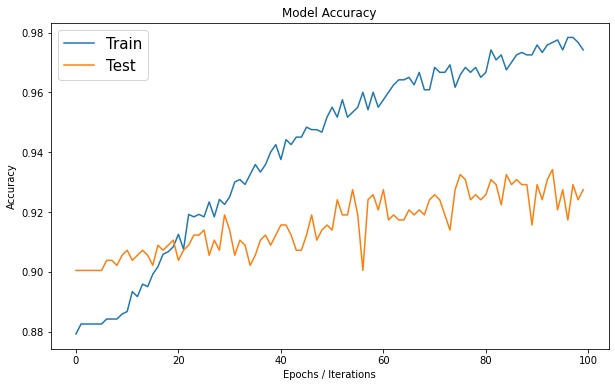

In [13]:
# plot accuracy
plt.figure(figsize=(10,6))

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs / Iterations')
plt.legend(['Train', 'Test'], loc='upper left',fontsize=15)

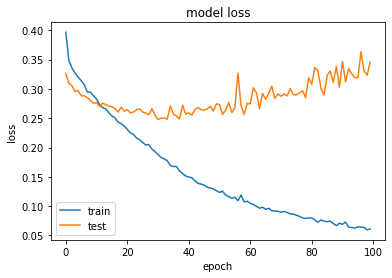

In [14]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

What you are experiencing is known as overfitting, and it’s a common problem in machine learning and data science.

Overfitting happens when a model begins to focus on the noise in the training data set and extracts features based on it. 
This helps the model to improve its performance on the training set but hurts its ability to generalize so the 
accuracy on the validation set decreases.

To deal with overfitting, you need to use regularization during the training. 
You can try adding dropout layers or batch-normalization layers, adding weight regularization, or 
you can artificially increase the size of your training set by performing some data augmentation.


Reduce your learning rate to a very small number like 0.001 or even 0.0001.
Provide more data.
Set Dropout rates to a number like 0.2. Keep them uniform across the network.
Try decreasing the batch size.
Using appropriate optimizer: You may need to experiment a bit on this. Use different optimizers on the same network, and select an optimizer which gives you the least loss.